In [3]:
import numpy as np

from tick.hawkes import SimuHawkes, HawkesKernelSumExp, HawkesKernelExp
from tick.plot import plot_point_process, plot_hawkes_kernels

import matplotlib.pyplot as plt

Time until which this point process will be simulated

In [2]:
run_time = 40

n_nodes=1 for an univariate process

In [3]:
hawkes = SimuHawkes(n_nodes=1, end_time=run_time, verbose=True, seed=1398)

Definition of the exponential kernel 

In [4]:
alpha = 0.5 # intensity of the kernel
beta = 1. # decay of the kernel

In [5]:
kernel = HawkesKernelExp(alpha, beta)

In [6]:
hawkes.set_kernel(0, 0, kernel) # univariate kernel

Definition of the baseline

In [7]:
hawkes.set_baseline(0, 1.) # constant baseline 

Definition of the intensity

In [8]:
dt = 0.01
hawkes.track_intensity(dt)

Simulation performed

In [9]:
hawkes.simulate()

----------------------------------------
Launching simulation using SimuHawkes...
Done simulating using SimuHawkes in 3.68e-01 seconds.


Timestamps

In [10]:
timestamps = hawkes.timestamps

In [11]:
timestamps

[array([ 0.26171969,  0.3806286 ,  1.36922698,  1.60977497,  3.70263736,
         3.74612214,  4.14280944,  4.67876526,  4.74854574,  5.29810156,
         6.31200613,  6.80841097,  7.22418089,  7.53319446,  7.80036994,
         7.9016934 ,  8.25833508,  8.61132589,  9.00532577,  9.91215871,
        11.07209723, 11.15353168, 11.38766705, 11.40293351, 11.56569862,
        12.04688628, 12.37084127, 12.57974237, 12.59923119, 12.77227409,
        12.77908119, 13.07098926, 13.2613719 , 13.89580782, 14.03690422,
        14.18410231, 14.32091975, 14.327441  , 14.34106701, 15.50036178,
        16.42676839, 18.80525892, 18.91943677, 19.25724659, 19.688062  ,
        20.26607547, 20.38931199, 20.44097874, 20.61664342, 21.06616317,
        21.2507119 , 21.57415248, 21.99631256, 22.0343788 , 22.18784971,
        22.29601653, 22.35794595, 22.51172644, 22.51856557, 22.56255229,
        22.7221866 , 22.87270178, 23.6371422 , 23.74963424, 23.87865314,
        24.17650112, 24.29994557, 24.91810856, 25.1

Intensity

In [12]:
intensity = hawkes.tracked_intensity

In [13]:
intensity

[array([1.        , 1.        , 1.        , ..., 1.80166002, 1.79971583,
        1.79175852])]

Intensity times

In [14]:
intensity_times = hawkes.intensity_tracked_times

In [15]:
intensity_times

array([0.00000000e+00, 1.00000000e-02, 2.00000000e-02, ...,
       3.99775718e+01, 3.99800000e+01, 3.99900000e+01])

Plotting the result ($\lambda_t = 1 + 0.5 \int_0^t \exp(-(t-s)) dN_s$)

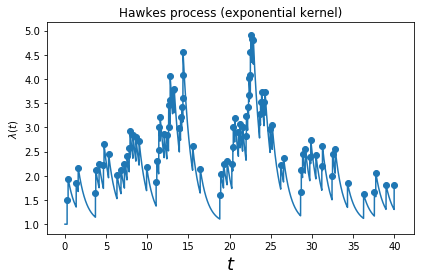

In [10]:
fig,ax = plt.subplots(1,1)


plot_point_process(hawkes, n_points=50000, ax=ax)

ax.set_ylabel('$\lambda(t)$')
plt.title("Hawkes process (exponential kernel)")
fig.tight_layout()
plt.show()

Simulation of a power law kernel

In [12]:
from tick.hawkes import HawkesKernelPowerLaw, HawkesConditionalLaw

kernel : $\phi(t) = \frac{\alpha}{(\delta + t)^{\beta}} \textbf{1}_{t >0}$

In [13]:
multiplier = 0.1 # alpha
cutoff = 0.5 # delta
exponent = 4. # beta
support = 2000 # upper bound of the support

In [14]:
kernel_pl = HawkesKernelPowerLaw(multiplier, cutoff, exponent, support)

Baseline parameter $\mu$

In [15]:
baseline_pl = 0.5

In [16]:
hawkes_pl = SimuHawkes(n_nodes=1, end_time=run_time , seed=382, verbose=True)

In [17]:
hawkes_pl.set_kernel(0, 0, kernel_pl)

In [18]:
hawkes_pl.set_baseline(0, baseline_pl)

Verfy the norm (must be < 1)

In [19]:
kernel_pl.get_norm()

0.2666666666625031

In [20]:
dt = 0.01
hawkes_pl.track_intensity(dt)

In [21]:
hawkes_pl.simulate()

----------------------------------------
Launching simulation using SimuHawkes...
Done simulating using SimuHawkes in 5.13e-02 seconds.


In [22]:
intensity_pl = hawkes_pl.tracked_intensity

In [28]:
intensity_pl

[array([0.5       , 0.5       , 0.5       , ..., 0.67992852, 0.67300492,
        0.66641283])]

In [29]:
timestamps_pl = hawkes_pl.timestamps

In [30]:
timestamps_pl

[array([ 1.39800107,  1.46084807,  3.75557734,  4.49255862,  4.86912839,
         5.18885071,  7.54422235, 10.08579489, 11.40097437, 12.40380973,
        12.93447633, 14.44968325, 14.61994016, 14.62261229, 14.68362669,
        14.70609153, 14.88783137, 15.94654675, 17.65968409, 18.70427331,
        18.82163262, 19.31437578, 22.01114914, 22.39408667, 22.43338366,
        22.78016089, 23.13763636, 24.62431262, 25.46200504, 25.59067003,
        31.35997309, 32.0125269 , 34.44088276, 39.35175386, 39.50611841])]

In [31]:
intensity_times_pl = hawkes_pl.intensity_tracked_times

In [32]:
intensity_times_pl

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 3.997e+01, 3.998e+01,
       3.999e+01])

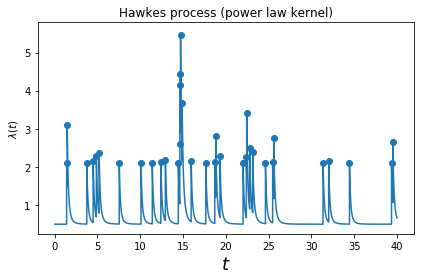

In [23]:
fig_pl,ax_pl = plt.subplots(1,1)


plot_point_process(hawkes_pl, n_points=50000, ax=ax_pl)

ax_pl.set_ylabel('$\lambda(t)$')
plt.title("Hawkes process (power law kernel)")
fig_pl.tight_layout()
plt.show()

Testing parametric estimation on simulated data

In [24]:
from tick.hawkes import SimuHawkesSumExpKernels, HawkesSumExpKern

In [25]:
end_time = 1000

decays = [0.1, 0.5, 1.] # sum of three exponential functions -> list of the beta coefficients
baseline = [0.12, 0.07]
adjacency = [[[0, .1, .4], [.2, 0., .2]],
             [[0, 0, 0], [.6, .3, 0]]] # alpha matrix -> bivariate process


Simulation of a Hawkes process with sum-of-exponentials kernel 

In [26]:
hawkes_exp_kernels = SimuHawkesSumExpKernels(
    adjacency=adjacency, decays=decays, baseline=baseline,
    end_time=end_time, verbose=True, seed=1039)

In [27]:
hawkes_exp_kernels.track_intensity(0.1)
hawkes_exp_kernels.simulate()

-----------------------------------------------------
Launching simulation using SimuHawkesSumExpKernels...
Done simulating using SimuHawkesSumExpKernels in 4.22e-02 seconds.


In [9]:
hawkes_exp_kernels.timestamps

[array([  8.07973295,  52.06570109,  54.98603575,  55.47248514,
         56.62529529,  67.50286854,  69.77853014,  71.31454956,
         71.9822981 ,  76.02288614,  79.18473047,  85.1330986 ,
         85.14602597,  86.5862555 ,  94.31599964,  96.63047829,
         96.81963812,  98.26298325,  98.39889061,  98.59154856,
        100.93200828, 101.81614065, 106.87274673, 107.17987003,
        108.79992302, 115.67967336, 116.33303524, 116.76980239,
        130.4044442 , 132.85752942, 138.67554092, 139.1975983 ,
        139.39436649, 139.65104368, 139.66227914, 139.91145782,
        148.21950748, 148.33872838, 149.2957764 , 151.22008828,
        151.49289493, 152.58444751, 153.20535949, 153.93960616,
        156.58416723, 156.94093841, 173.08883538, 173.95811533,
        174.00568858, 174.92280182, 185.17895184, 185.4596024 ,
        192.72904357, 203.54608202, 203.96443621, 204.29742408,
        207.79417881, 207.9438326 , 208.0025399 , 208.47693469,
        208.49618555, 208.84634262, 210.

Timestamps have to be given to a learner.

Plot of the bidimensional process

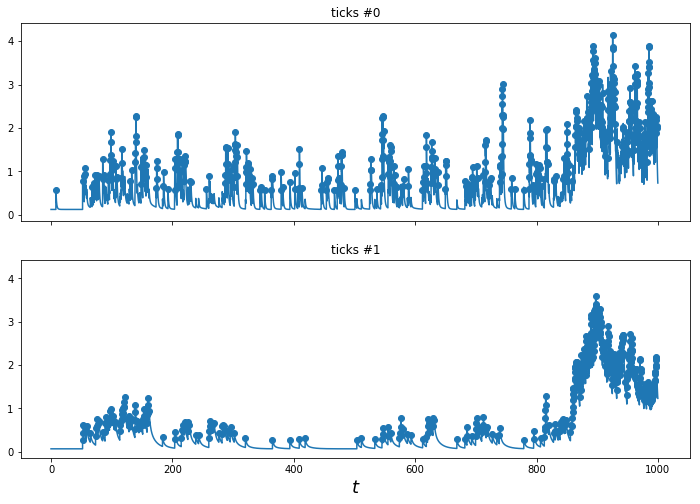

In [28]:
plot_point_process(hawkes_exp_kernels, n_points=50000)
plt.show()

Estimation procedure

In [29]:
learner = HawkesSumExpKern(decays, penalty='elasticnet',elastic_net_ratio=0.8)
learner.fit(hawkes_exp_kernels.timestamps)

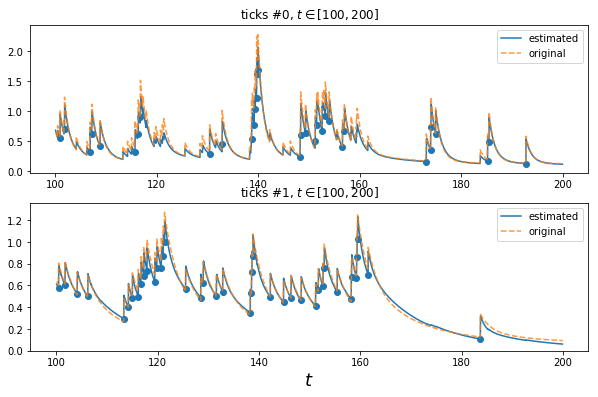

In [30]:
t_min = 100
t_max = 200

fig, ax_list = plt.subplots(2, 1, figsize=(10, 6))
learner.plot_estimated_intensity(hawkes_exp_kernels.timestamps,
                                 t_min=t_min, t_max=t_max,
                                 ax=ax_list)

plot_point_process(hawkes_exp_kernels, plot_intensity=True,
                   t_min=t_min, t_max=t_max, ax=ax_list)

# Enhance plot
for ax in ax_list:
    # Set labels to both plots
    ax.lines[0].set_label('estimated')
    ax.lines[1].set_label('original')

    # Change original intensity style
    ax.lines[1].set_linestyle('--')
    ax.lines[1].set_alpha(0.8)

    # avoid duplication of scatter plots of events
    ax.collections[1].set_alpha(0)

    ax.legend()

plt.show()

Parameter estimation of a Hawkes process with single exponential kernel

In [1]:
from tick.hawkes import HawkesKernelExp, SimuHawkesExpKernels

In [2]:
decay_exp = 0.3
adjacency_exp = np.array([[0.5]])
baseline_exp = [0.5]
end_time_exp = 1e3

NameError: name 'np' is not defined

In [ ]:
hawkes_exp = SimuHawkesExpKernels(
    adjacency=adjacency_exp, decays=decay_exp, baseline=baseline_exp,
    end_time=end_time_exp, verbose=True, seed=1039)
hawkes_exp.track_intensity(0.1)
hawkes_exp.simulate()

In [ ]:
plot_point_process(hawkes_exp, n_points=50000)
plt.show()

Estimation with known decay parameter

In [55]:
from tick.hawkes import HawkesExpKern

In [56]:
learner_exp = HawkesExpKern(decay_exp, penalty='l1', C=10)

In [57]:
learner_exp.fit(hawkes_exp.timestamps)

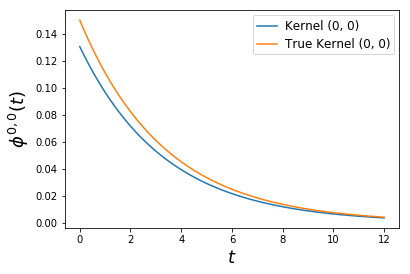

In [63]:
plot_hawkes_kernels(learner_exp, hawkes=hawkes_exp)
plt.show()

Alternative method

In [60]:
from tick.hawkes import HawkesADM4

In [61]:
learnerADM4 = HawkesADM4(decay_exp)
learnerADM4.fit(hawkes_exp.timestamps)

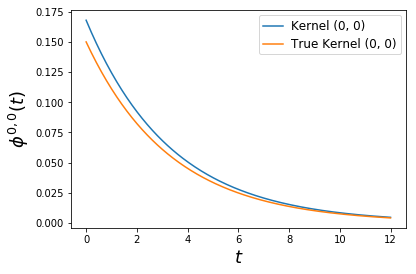

In [62]:
plot_hawkes_kernels(learnerADM4, hawkes=hawkes_exp)
plt.show()

Testing estimation on Bund data

In [36]:
from tick.dataset import fetch_hawkes_bund_data
from tick.hawkes import HawkesConditionalLaw
from tick.plot import plot_hawkes_kernel_norms

In [37]:
timestamps_list = fetch_hawkes_bund_data()

(5.88 MB) [========================================] 100%


In [45]:
len(timestamps_list)

20

In [48]:
day1 = timestamps_list[0] # first day

In [51]:
len(day1)

4

In [53]:
midprice_up= day1[0]

In [54]:
len(midprice_up)

5295

In [55]:
midprice_up[:10]

array([62.901048, 62.931302, 63.053994, 63.405548, 63.568121, 64.924123,
       64.970995, 64.992722, 65.236257, 65.238754])

In [56]:
midprice_down= day1[1]

In [57]:
len(midprice_down)

5466

In [58]:
midprice_down[:10]

array([63.050326, 63.050632, 63.053646, 63.055503, 63.407017, 63.569682,
       64.902133, 64.906459, 64.953603, 64.993203])